# Data Visualization
# Put into practice 2

### <font color='blue'> Name: Dilan Gonzalez Castaneda</font>
### <font color='blue'> ID: A00831905</font>

#### It's time to put your knowledge into practice. Here you will develop an activity that consists mainly in mastering databases and data visualization with the use of Python. Read carefully the following indications and develop the execution, it will be the evidence that you have done your learning activity.

#### Development of the activity

For this activity we will include a dataset related to cirrhosis patient survival prediction. The classification goal is to predict the survival states including 0 = D (death), 1 = C (censored), 2 = CL (censored due to liver transplantation). You can find it in the UC Irvine Machine Learning Repository https://archive.ics.uci.edu/dataset/878/cirrhosis+patient+survival+prediction+dataset-1 

Cirrhosis results from prolonged liver damage, leading to extensive scarring, often due to conditions like hepatitis or chronic alcohol consumption. The data provided is sourced from a Mayo Clinic study on primary biliary cirrhosis (PBC) of the liver carried out from 1974 to 1984.

Develop the following points in a Jupyter Notebook, trying, as much as possible, that each point is worked in a different cell. Comments in the code are always welcome, as they help a reader to understand more easily what the creator of the file programmed.

1. Import the data using the following code or by downloading the csv file found in the dataset link.

In [1]:
!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
cirrhosis_patient_survival_prediction = fetch_ucirepo(id=878) 
  
# data (as pandas dataframes) 
X = cirrhosis_patient_survival_prediction.data.features 
y = cirrhosis_patient_survival_prediction.data.targets 


#Combine in one dataframe X and y
import pandas as pd
df = pd.concat([X,y], axis=1)

# variable information 
cirrhosis_patient_survival_prediction.variables

,name,role,type,demographic,description,units,missing_values
0,ID,ID,Integer,None,unique identifier,None,no
1,N_Days,Other,Integer,None,number of days between registration and the ea...,None,no
2,Status,Target,Categorical,None,"status of the patient C (censored), CL (censor...",None,no
3,Drug,Feature,Categorical,None,type of drug D-penicillamine or placebo,None,yes
4,Age,Feature,Integer,Age,age,days,no
5,Sex,Feature,Categorical,Sex,M (male) or F (female),None,no
6,Ascites,Feature,Categorical,None,presence of ascites N (No) or Y (Yes),None,yes
7,Hepatomegaly,Feature,Categorical,None,presence of hepatomegaly N (No) or Y (Yes),None,yes
8,Spiders,Feature,Categorical,None,presence of spiders N (No) or Y (Yes),None,yes
9,Edema,Feature,Categorical,None,presence of edema N (no edema and no diuretic ...,None,no


2. Print the first 10 rows of data sorted from the Copper variable in descending order. You can mix the sort_values() function with head().

In [3]:
df.sort_values(by='Copper', ascending=False).head(10)

,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
125,D-penicillamine,19577,F,Y,Y,Y,N,1.2,269,3.12,NaNN,1441.0,165.85,68,166,11.1,4.0,D
237,Placebo,24257,F,N,N,N,S,0.6,280,3.35,NaNN,1093.0,128.65,81,295,9.8,2.0,C
281,Placebo,12398,F,N,Y,N,N,1.3,304,3.52,97,1622.0,71.00,169,255,9.5,4.0,C
144,Placebo,18701,F,N,N,Y,N,0.7,309,3.84,96,858.0,41.85,106,253,11.4,3.0,C
40,D-penicillamine,12285,F,N,Y,N,N,6.8,NaNN,3.26,96,1215.0,151.90,NaNN,226,11.7,4.0,D
219,D-penicillamine,23241,F,N,N,Y,N,3.8,426,3.22,96,2716.0,210.80,113,228,10.6,2.0,D
62,Placebo,17031,F,N,N,Y,Y,22.5,932,3.12,95,5396.0,244.90,133,165,11.6,3.0,D
89,D-penicillamine,12227,M,N,N,N,N,1.6,660,4.22,94,1857.0,151.90,155,337,11.0,2.0,D
11,Placebo,21600,F,N,N,Y,N,3.6,236,3.52,94,591.0,82.15,95,71,13.6,4.0,D
52,D-penicillamine,24621,F,N,Y,N,N,2.6,NaNN,3.10,94,6456.2,56.76,NaNN,214,11.0,4.0,D


3. Get the unique or available values in the Drug column. Use unique() or value_counts()

In [4]:
df['Drug'].unique()

array(['D-penicillamine', 'Placebo', 'NaNN', nan], dtype=object)

4. If you did number 3 correctly you will notice that there are missing values but also a string 'NaNN' which itself represents missing values. Replace for the whole dataframe the 'NaNN' values with null data. Look for the numpy function np.nan and you can use the replace() function.

In [5]:
import numpy as np
df['Drug'] = df['Drug'].replace('NaNN', np.nan)
df['Drug'].unique()

array(['D-penicillamine', 'Placebo', nan], dtype=object)

5. Finds how many rows and columns are in the dataset.

In [6]:
df.shape

(418, 18)

6. Print the variable type of the data set. Use the info() function

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Drug           312 non-null    object 
 1   Age            418 non-null    int64  
 2   Sex            418 non-null    object 
 3   Ascites        313 non-null    object 
 4   Hepatomegaly   313 non-null    object 
 5   Spiders        313 non-null    object 
 6   Edema          418 non-null    object 
 7   Bilirubin      418 non-null    float64
 8   Cholesterol    312 non-null    object 
 9   Albumin        418 non-null    float64
 10  Copper         312 non-null    object 
 11  Alk_Phos       312 non-null    float64
 12  SGOT           312 non-null    float64
 13  Tryglicerides  312 non-null    object 
 14  Platelets      411 non-null    object 
 15  Prothrombin    416 non-null    float64
 16  Stage          412 non-null    float64
 17  Status         418 non-null    object 
dtypes: float64

7. There are 4 variables that are in object type that we know are numeric, change them. You can use a similar code. Look for the function to_numeric(). 

In [8]:
# Change all variables object to numeric if possible
df['Cholesterol'] = pd.to_numeric(df['Cholesterol'], errors='coerce')
df['Copper'] = pd.to_numeric(df['Copper'], errors='coerce')
df['Tryglicerides'] = pd.to_numeric(df['Tryglicerides'], errors='coerce')
df['Platelets'] = pd.to_numeric(df['Platelets'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Drug           312 non-null    object 
 1   Age            418 non-null    int64  
 2   Sex            418 non-null    object 
 3   Ascites        313 non-null    object 
 4   Hepatomegaly   313 non-null    object 
 5   Spiders        313 non-null    object 
 6   Edema          418 non-null    object 
 7   Bilirubin      418 non-null    float64
 8   Cholesterol    284 non-null    float64
 9   Albumin        418 non-null    float64
 10  Copper         310 non-null    float64
 11  Alk_Phos       312 non-null    float64
 12  SGOT           312 non-null    float64
 13  Tryglicerides  282 non-null    float64
 14  Platelets      407 non-null    float64
 15  Prothrombin    416 non-null    float64
 16  Stage          412 non-null    float64
 17  Status         418 non-null    object 
dtypes: float64

8. Delete all rows containing null data in the variable “Drug”. You can use dropna() with the subset argument.

In [9]:
df.dropna(subset=['Drug'], inplace=True)
df.shape

(312, 18)

9. Print now how much null data still exists in the database for each variable.

In [10]:
df.isna().sum()

Drug              0
Age               0
Sex               0
Ascites           0
Hepatomegaly      0
Spiders           0
Edema             0
Bilirubin         0
Cholesterol      28
Albumin           0
Copper            2
Alk_Phos          0
SGOT              0
Tryglicerides    30
Platelets         4
Prothrombin       0
Stage             0
Status            0
dtype: int64

10. Variables that still have missing data should be numeric variables. This time replace the missing values with the mean.

In [11]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())
df.isna().sum()

Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
Status           0
dtype: int64

11. Import the seaborn and matplotlib.pyplot libraries.

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

12. For each categorical type variable, make a bar chart, you can use the same code from interactive reading 2.

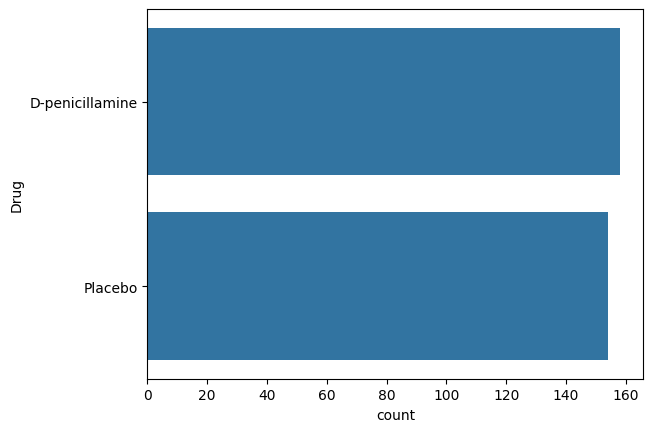

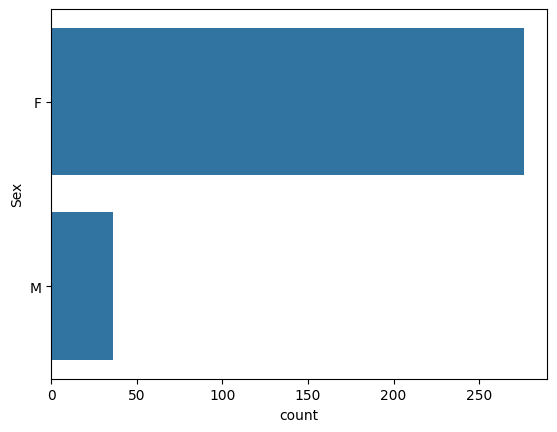

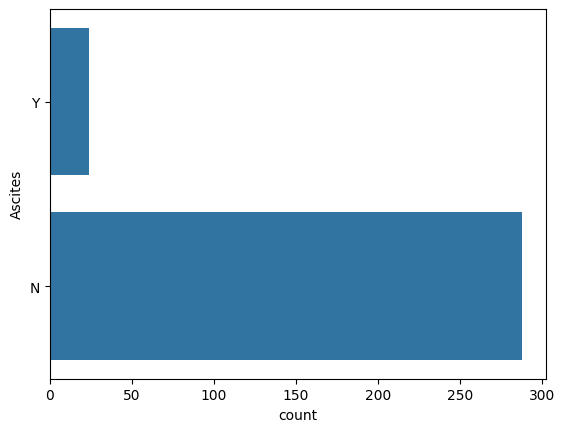

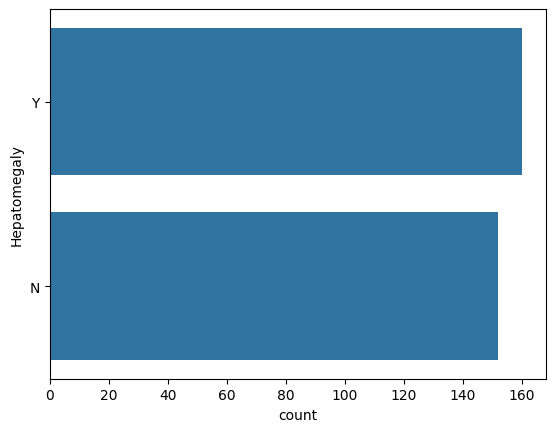

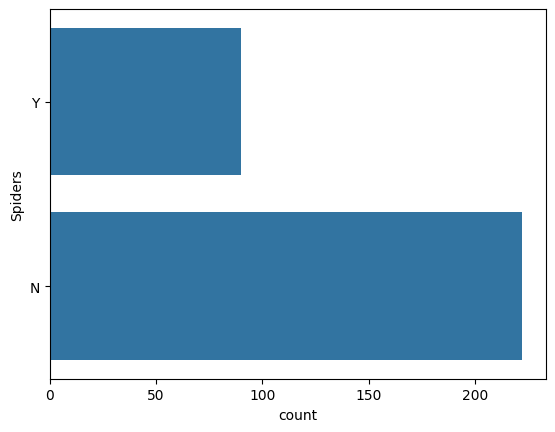

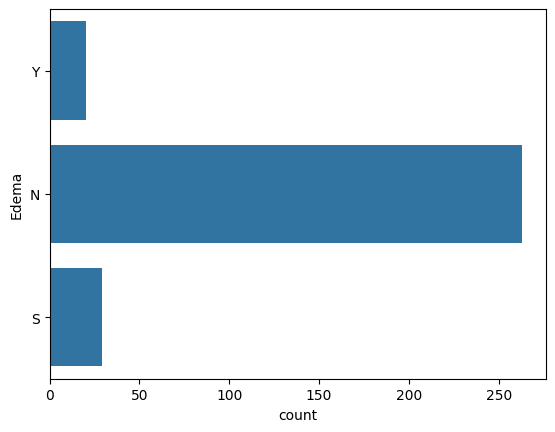

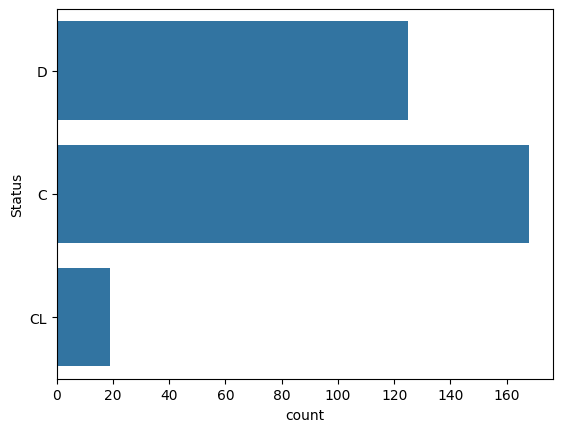

In [13]:
# Write the requested lines of code below
for col in df.select_dtypes(include='object'):
    if df[col].nunique() < 43:
        sns.countplot(y=col, data=df)
        plt.show()

13. Find how many values there are for each status D, C and CL.

In [14]:
df['Status'].value_counts()

Status
C     168
D     125
CL     19
Name: count, dtype: int64

14. Make histograms for each numerical variable.

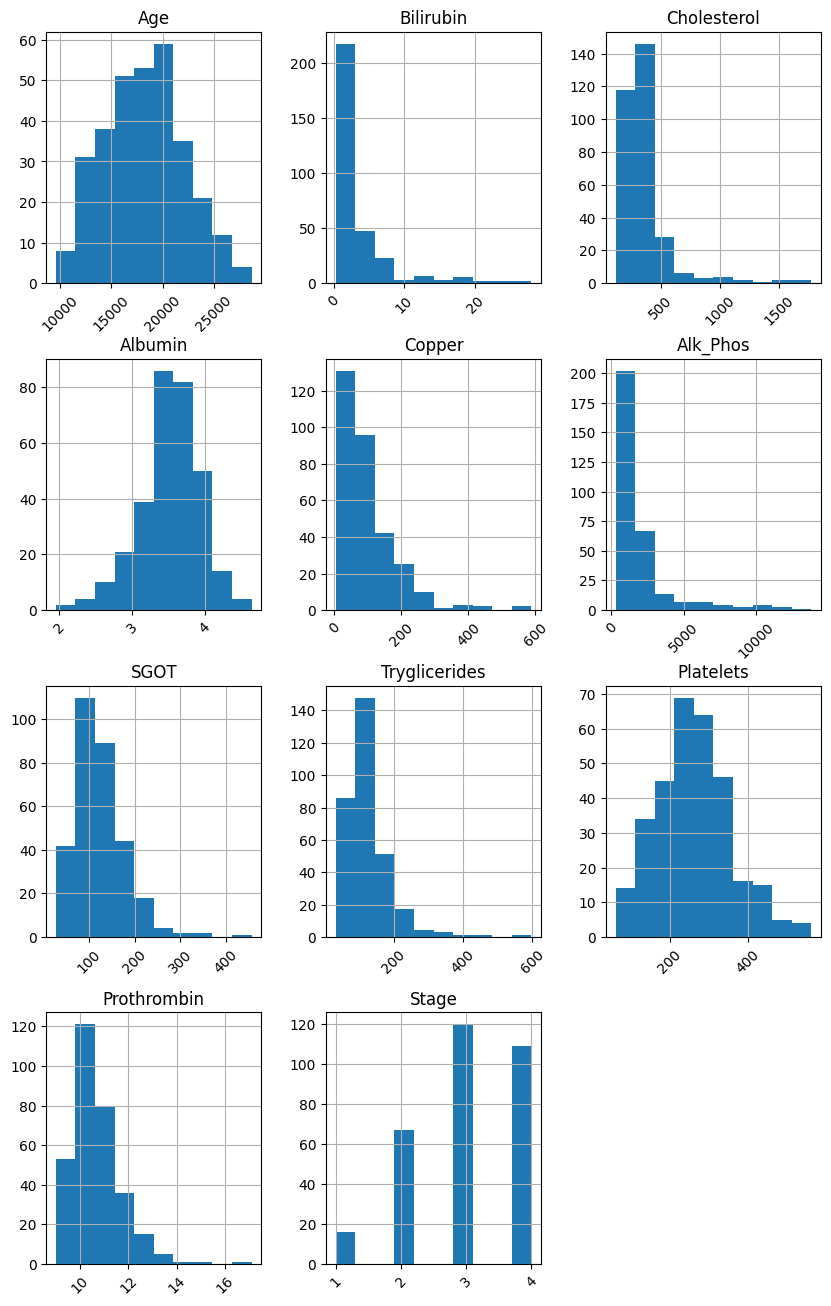

In [15]:
df.hist(figsize=(10, 16), xrot=45)
plt.show()

15. For each categorical variable make a graph where it is segmented by the output variable. Take as an example as we did in interactive reading 2 and modify the stat argument. Try stat="density".

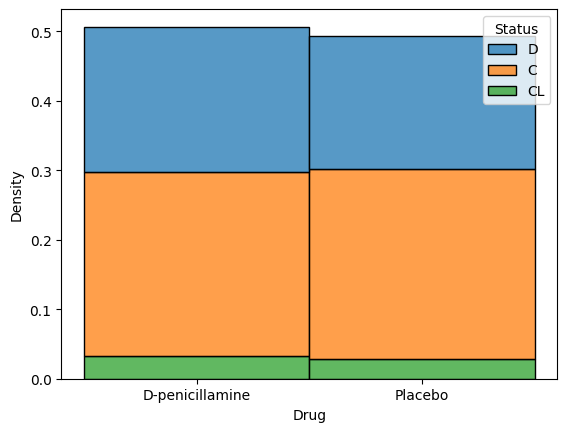

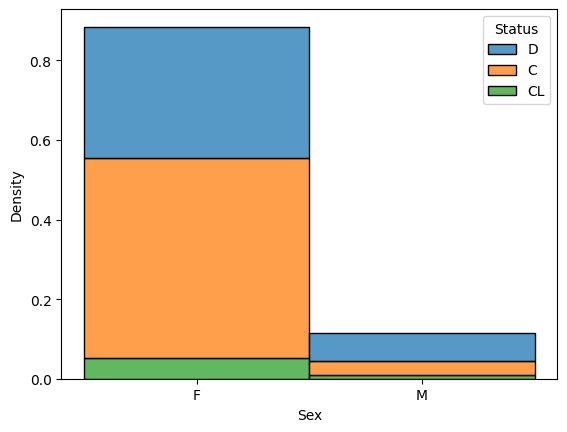

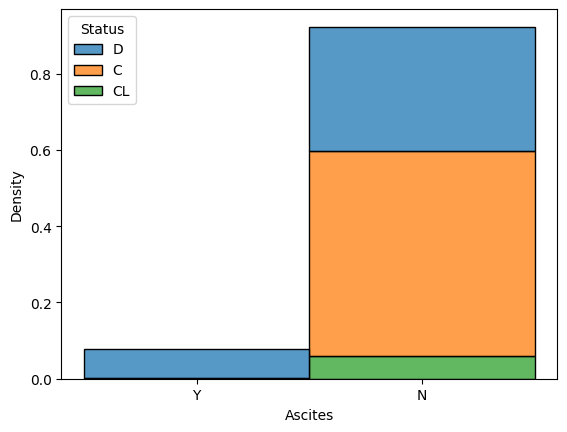

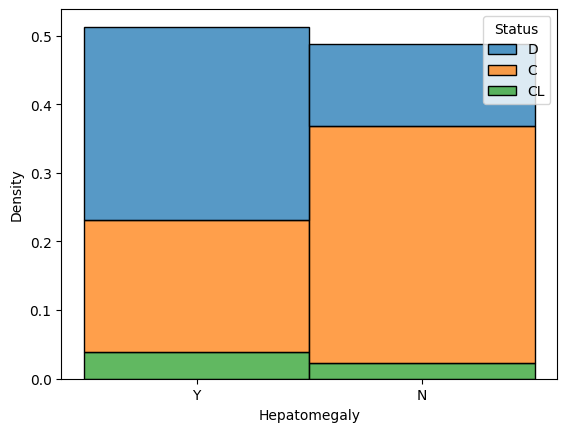

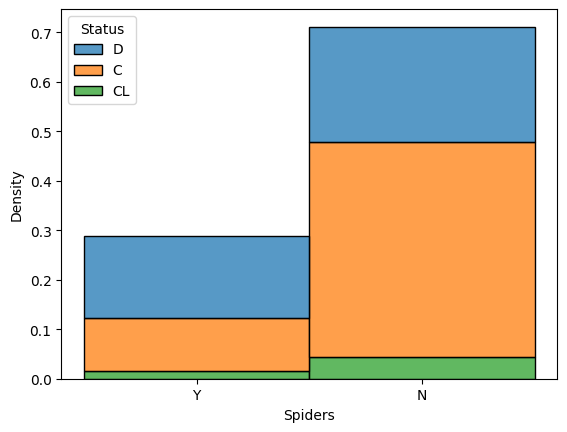

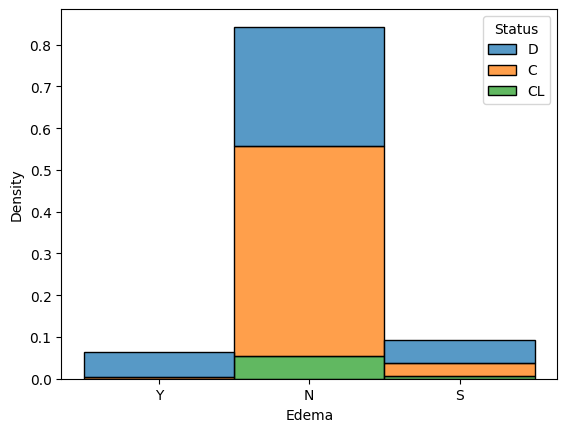

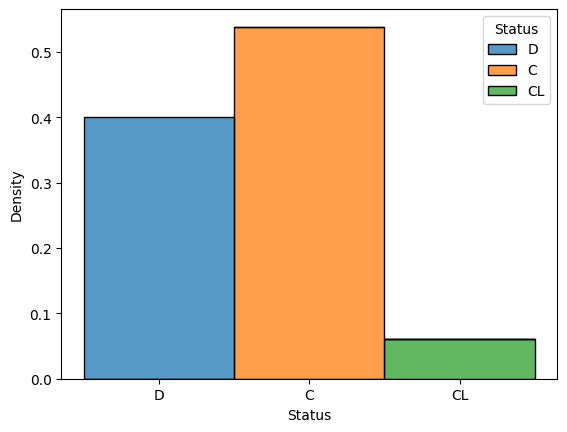

In [16]:
for col in df.select_dtypes(include='object'):
    if df[col].nunique() < 10:
        sns.histplot(binwidth=0.5, x=col, data=df, hue='Status', stat='density', multiple='stack')
        plt.show()

16. Make the same graph of numerical variables depending on the output as in the interactive reading 2 but instead of boxplots make it in the form of violins. Modify the kind argument.

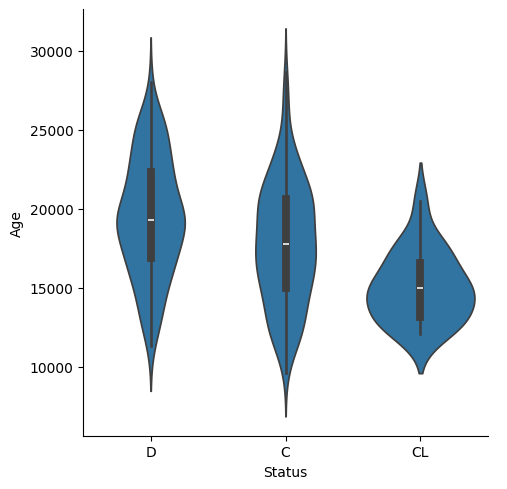

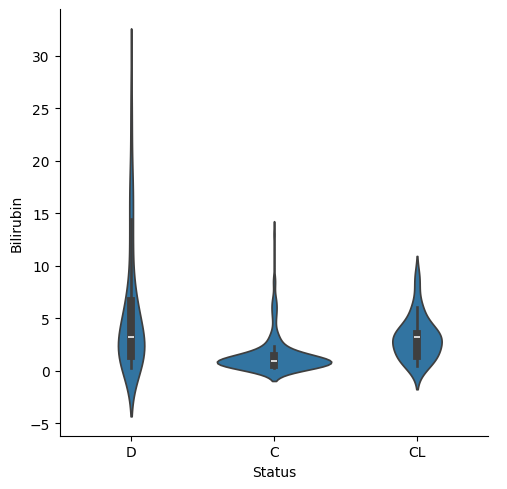

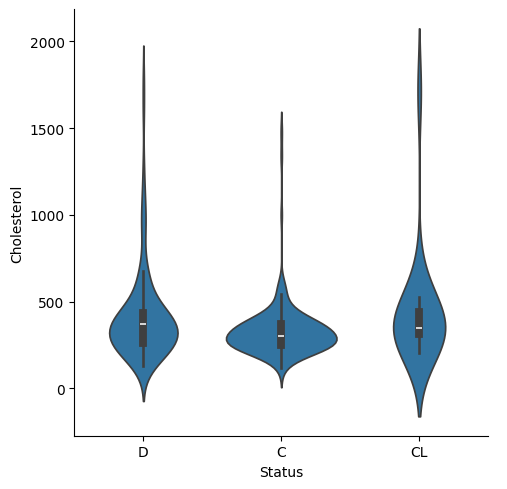

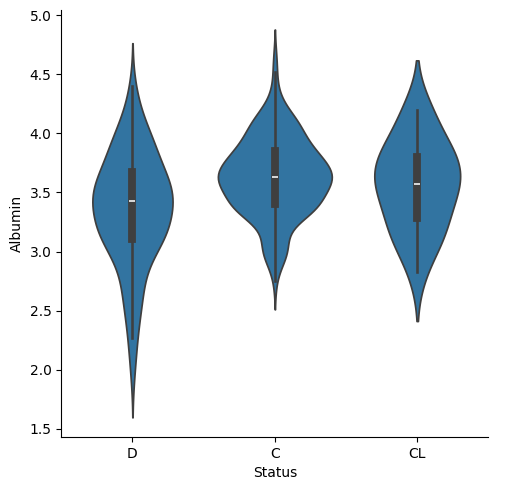

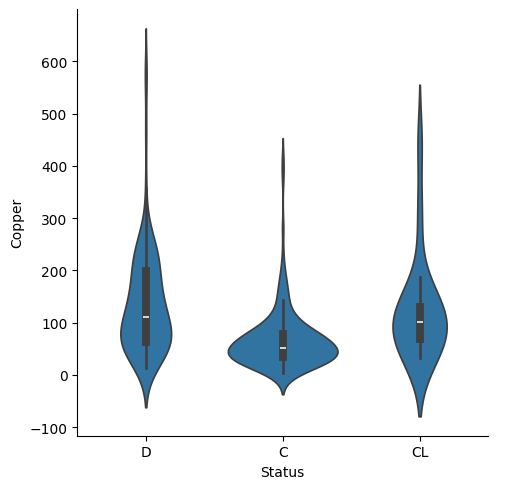

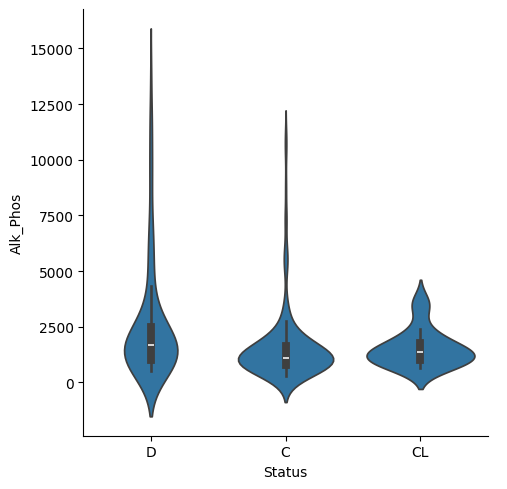

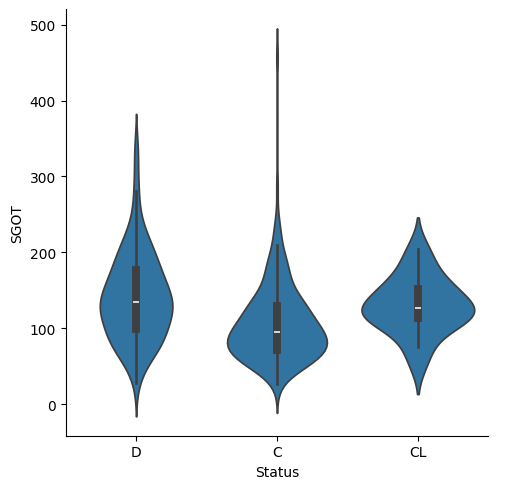

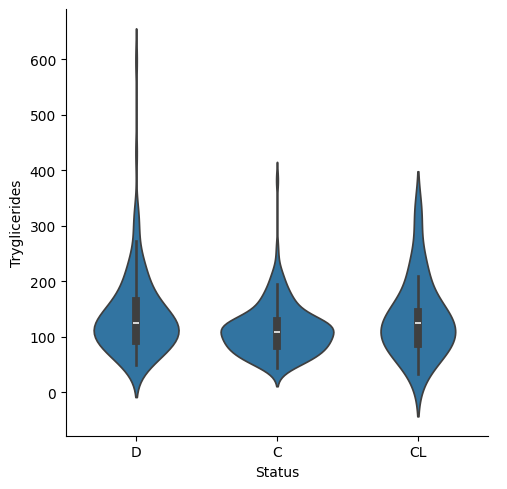

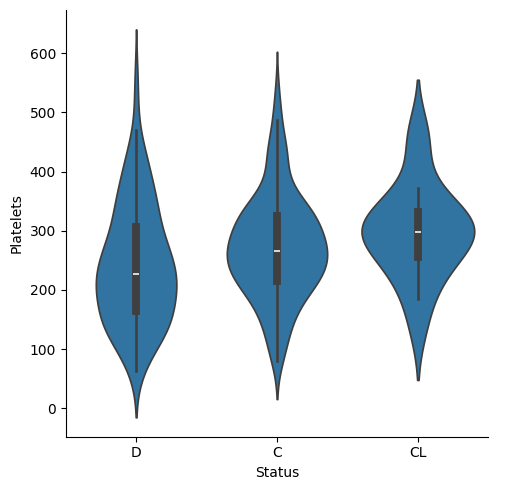

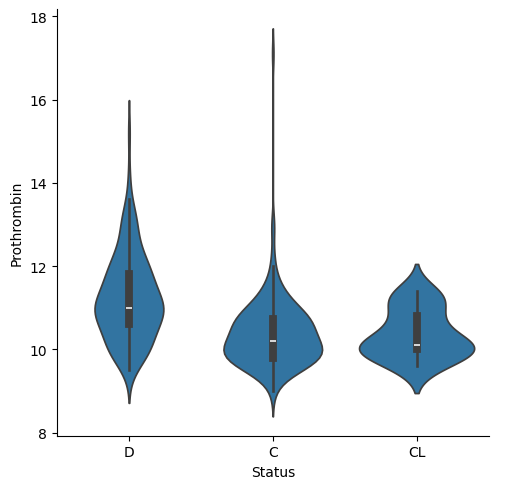

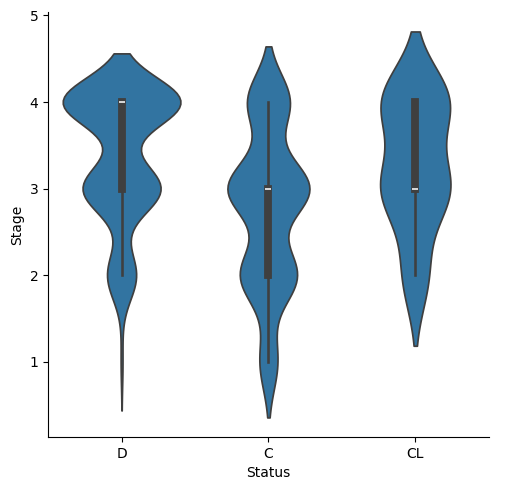

In [17]:
# Write the requested lines of code below
for col in df.select_dtypes(include=['int64', 'float64']):
    sns.catplot(x='Status', y=col, data=df, kind='violin', dodge=False)
    plt.show()

17. Create a matrix scatterplot

5 columns were label encoded.


[Text(0.5, 0, 'Age'),
 Text(1.5, 0, 'Bilirubin'),
 Text(2.5, 0, 'Cholesterol'),
 Text(3.5, 0, 'Albumin'),
 Text(4.5, 0, 'Copper'),
 Text(5.5, 0, 'Alk_Phos'),
 Text(6.5, 0, 'SGOT'),
 Text(7.5, 0, 'Tryglicerides'),
 Text(8.5, 0, 'Platelets'),
 Text(9.5, 0, 'Prothrombin'),
 Text(10.5, 0, 'Stage')]

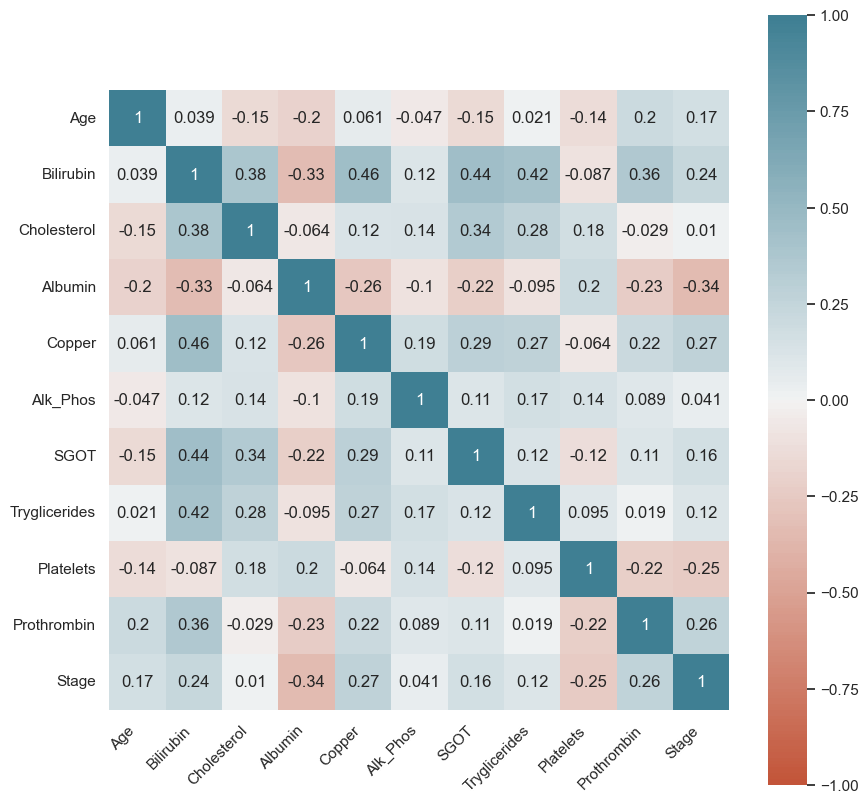

In [18]:
from sklearn.preprocessing import LabelEncoder
#Create a label encoder object
le = LabelEncoder()
# Label Encoding will be used for columns with 2 or less unique values
le_count = 0
for col in df.columns[0:]:
    if df[col].dtype == 'object':
        if len(list(df[col].unique())) <= 2:
            le.fit(df[col])
            df[col] = le.transform(df[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

x_num = df.select_dtypes(include=['int64', 'float64'])
corrmat = x_num.corr()

#Correlation matrix
plt.figure(figsize=(10,10))
sns.set(style="darkgrid")

ax = sns.heatmap(corrmat,
                 vmin=-1, vmax=1, center=0, annot=True,
                 cmap=sns.diverging_palette(20, 220, n=200),
                 square=True)

ax.set_xticklabels(ax.get_xticklabels(),
                 rotation=45,
                 horizontalalignment='right')

18. To the categorical variables do a one hot encoding process with the pandas function get_dummies(). Print the first 5 rows of data and see what happened.

In [21]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()

,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Edema_S,Edema_Y,Status_CL,Status_D
0,0,21464,0,1,1,1,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0,False,True,False,True
1,0,20617,0,0,1,1,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0,False,False,False,False
2,0,25594,1,0,0,0,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0,True,False,False,True
3,0,19994,0,0,1,1,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0,True,False,False,True
4,1,13918,0,0,1,1,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0,False,False,True,False


19. Finally make a correlation matrix and plot it.

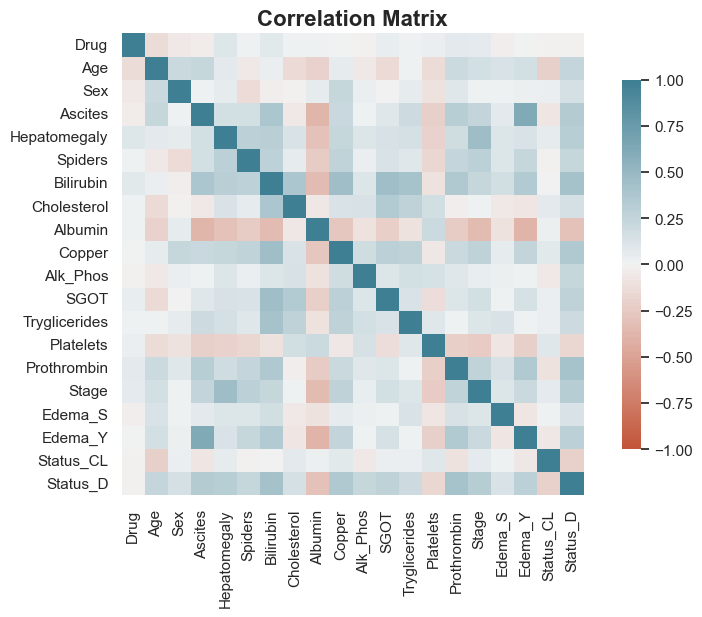

In [28]:
# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, vmin=-1, vmax=1, center=0, annot=False, cmap=sns.diverging_palette(20, 220, n=200), square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix', fontsize=16, weight='bold')
plt.show()